In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [9]:
df=pd.read_csv('Train.csv')

In [10]:
df.head(5)

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,...,40,24563.0,30051.32,12761.0,2,65,50836.0,Y,1674.09,20014
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,...,78,23948.0,42119.05,76206.0,21,63,23226.0,Y,13043.34,10173
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,...,82,10752.0,58373.25,75283.0,7,1,27036.0,Y,25375.27,16095
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,...,38,12607.0,69851.51,68708.0,21,83,43037.0,Y,3544.33,7707
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,...,50,25213.0,10071.00,80140.0,8,32,32044.0,Y,12780.44,96408


In [11]:
df=df.set_index('ID')

In [12]:
df.dtypes

account_type              object
gender                    object
age                        int64
region_code                int64
cc_cons_apr              float64
dc_cons_apr              float64
cc_cons_may              float64
dc_cons_may              float64
cc_cons_jun              float64
dc_cons_jun              float64
cc_count_apr               int64
cc_count_may               int64
cc_count_jun               int64
dc_count_apr               int64
dc_count_may               int64
dc_count_jun               int64
card_lim                   int64
personal_loan_active       int64
vehicle_loan_active        int64
personal_loan_closed       int64
vehicle_loan_closed        int64
investment_1             float64
investment_2             float64
investment_3             float64
investment_4             float64
debit_amount_apr         float64
credit_amount_apr        float64
debit_count_apr            int64
credit_count_apr           int64
max_credit_amount_apr    float64
debit_amou

In [14]:
le_ac=LabelEncoder()
le_g=LabelEncoder()
le_le=LabelEncoder()

df.account_type=le_ac.fit_transform(df.account_type)
df.gender=le_g.fit_transform(df.gender)
df.loan_enq =le_le.fit_transform(df.loan_enq)

In [15]:
df.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,
12554,0,1,35,708,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,...,40,24563.0,30051.32,12761.0,2,65,50836.0,0,1674.09,20014
17645,0,1,35,123,18941.62,966.00,20672.00,287.00,4217.00,885.00,...,78,23948.0,42119.05,76206.0,21,63,23226.0,0,13043.34,10173
7604,0,1,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,...,82,10752.0,58373.25,75283.0,7,1,27036.0,0,25375.27,16095
1590,0,0,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,...,38,12607.0,69851.51,68708.0,21,83,43037.0,0,3544.33,7707
16556,0,1,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,...,50,25213.0,10071.00,80140.0,8,32,32044.0,0,12780.44,96408


In [16]:
df.corr().cc_cons

account_type             0.002929
gender                   0.002289
age                     -0.006965
region_code             -0.018824
cc_cons_apr              0.006155
dc_cons_apr             -0.000126
cc_cons_may              0.021822
dc_cons_may             -0.000642
cc_cons_jun             -0.000900
dc_cons_jun              0.002863
cc_count_apr            -0.009760
cc_count_may             0.016433
cc_count_jun            -0.002005
dc_count_apr            -0.000758
dc_count_may             0.007711
dc_count_jun            -0.006193
card_lim                -0.003155
personal_loan_active          NaN
vehicle_loan_active           NaN
personal_loan_closed          NaN
vehicle_loan_closed           NaN
investment_1             0.004086
investment_2             0.008877
investment_3            -0.011453
investment_4             0.001929
debit_amount_apr         0.003937
credit_amount_apr        0.005293
debit_count_apr         -0.001350
credit_count_apr        -0.002170
max_credit_amo

In [17]:
df.isna().sum()

account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     0
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
c

In [18]:
df1=df.drop(['loan_enq','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed'],axis=1)

In [19]:
df1.head(5)
df1.shape

(15000, 38)

In [180]:
df1.skew()

account_type              1.943852
gender                   -2.111613
age                       4.386093
region_code              -0.118365
cc_cons_apr               4.838710
dc_cons_apr               7.135574
cc_cons_may              12.056921
dc_cons_may              25.321685
cc_cons_jun               6.108982
dc_cons_jun               6.569554
cc_count_apr              4.417547
cc_count_may              7.518349
cc_count_jun              7.190550
dc_count_apr              1.102698
dc_count_may              1.526300
dc_count_jun              0.732877
card_lim                  0.442569
investment_1             11.603971
investment_2              5.475358
investment_3              4.075013
investment_4              1.084492
debit_amount_apr         13.104348
credit_amount_apr        32.632376
debit_count_apr           1.089453
credit_count_apr          1.161724
max_credit_amount_apr    47.952438
debit_amount_may         10.296853
credit_amount_may        23.391690
credit_count_may    

In [20]:
#df1.drop('loan_enq',axis=1,inplace=True)

In [21]:
import numpy as np
for col in df1.columns:
    if df1[col].skew()>0.5:
        df1[col]=np.sqrt(df1[col])
df1.head(5)
df1.shape

C:\Users\AP hatela\Miniconda\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(15000, 38)

In [22]:
df1.skew()

account_type             1.943852
gender                  -2.111613
age                      3.104259
region_code             -0.118365
cc_cons_apr              1.627942
dc_cons_apr              2.207385
cc_cons_may              2.002009
dc_cons_may              3.294896
cc_cons_jun              1.890619
dc_cons_jun              2.317558
cc_count_apr             2.653844
cc_count_may             1.677811
cc_count_jun             0.932037
dc_count_apr             0.592788
dc_count_may             0.884374
dc_count_jun             0.219475
card_lim                 0.442569
investment_1             4.713771
investment_2             1.784030
investment_3             1.833091
investment_4             0.394800
debit_amount_apr         2.415966
credit_amount_apr        4.068821
debit_count_apr          0.244746
credit_count_apr         0.586594
max_credit_amount_apr    7.221904
debit_amount_may         2.208993
credit_amount_may        3.273635
credit_count_may         1.155022
debit_count_ma

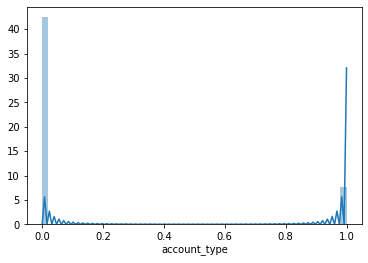

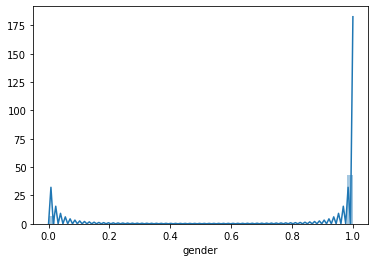

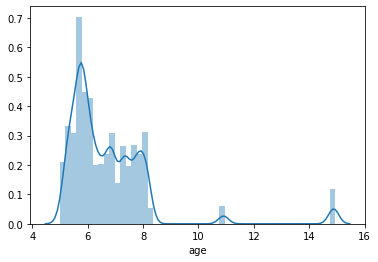

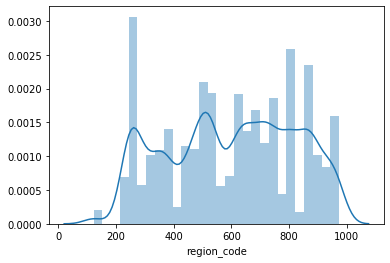

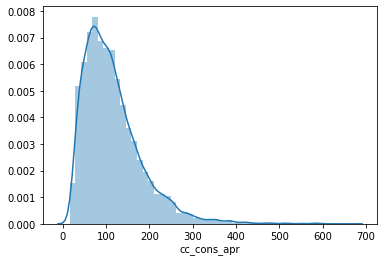

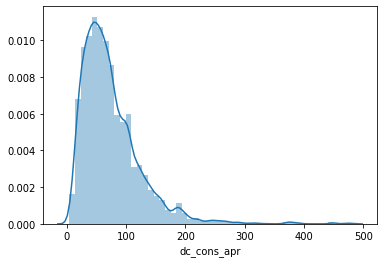

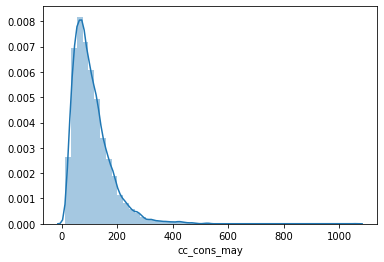

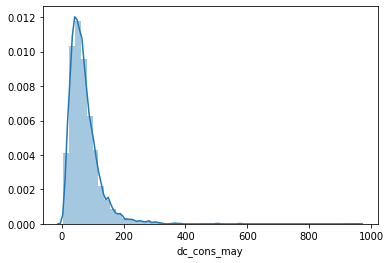

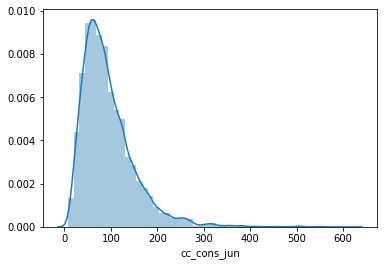

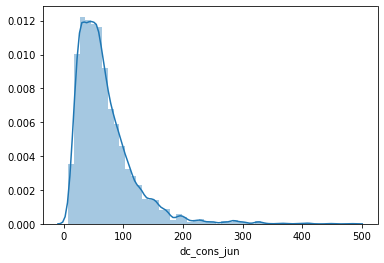

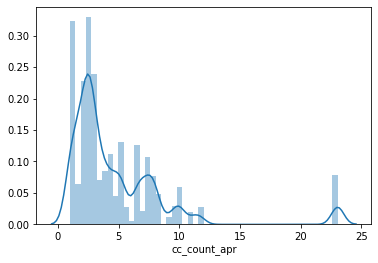

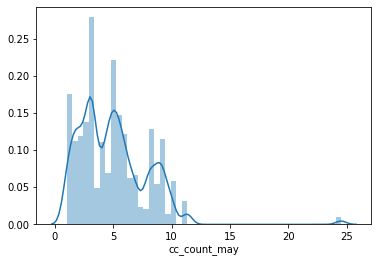

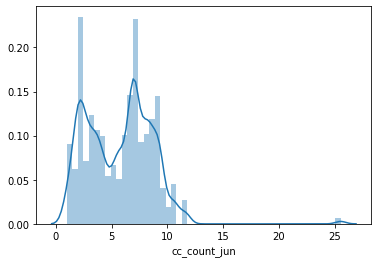

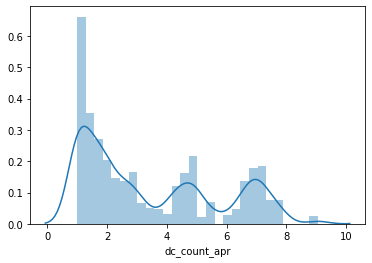

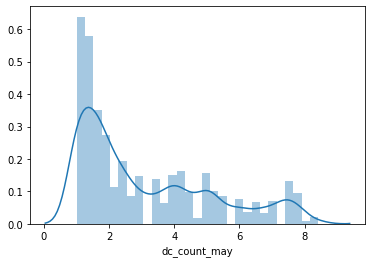

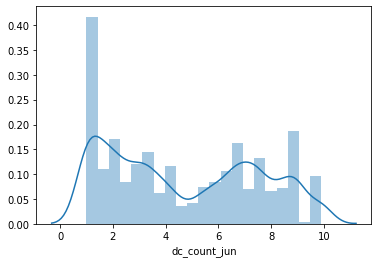

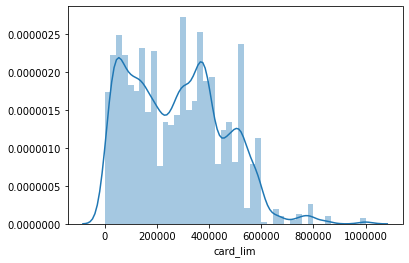

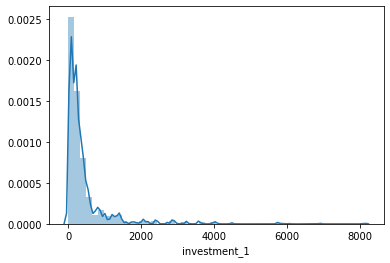

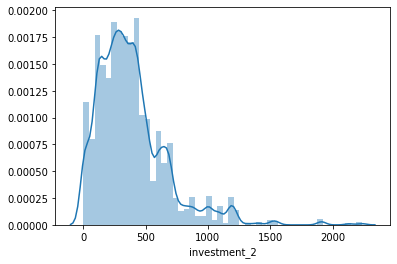

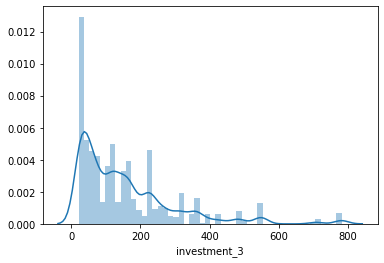

ValueError: cannot convert float NaN to integer

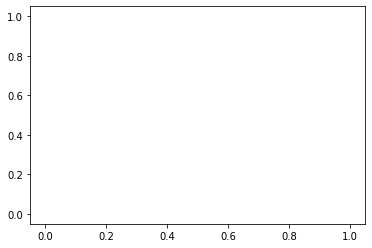

In [184]:
for col in df1.columns:
    sns.distplot(df1[col])
    plt.show()

In [23]:
df1.investment_4=df1.investment_4.fillna(0)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2 = scaler.fit_transform(df1)
df2 = pd.DataFrame(df2, columns=df1.columns)


In [25]:
df2.head(5)


,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,-0.422607,0.398433,-0.493897,0.497987,0.621926,-1.089665,-0.099215,2.012254,0.586095,0.784743,...,-0.658536,0.219276,-0.368001,-0.488127,-0.888411,-0.927725,0.706968,0.244119,-0.426406,-0.201571
1,-0.422607,0.398433,-0.493897,-2.160439,0.327632,-0.860493,0.522913,-1.118003,-0.510587,-0.816079,...,-0.658536,1.064314,-0.383652,-0.254387,0.247062,0.350058,0.663354,-0.375605,0.341804,-0.457946
2,-0.422607,0.398433,0.428705,0.925153,-0.581990,-0.444786,-0.938169,-0.195333,1.060809,0.058056,...,-0.658536,1.139685,-0.788369,0.012353,0.235388,-0.431052,-1.757044,-0.273611,0.814403,-0.293774
3,-0.422607,-2.509835,-0.820420,1.220534,0.867879,-0.780227,0.060386,0.467421,0.668813,0.990395,...,0.982799,0.165301,-0.720289,0.178725,0.150062,0.350058,1.072675,0.091327,-0.231254,-0.540470
4,-0.422607,0.398433,-0.546252,0.925153,-0.422689,0.163880,-0.618820,-0.571881,-0.840891,0.281052,...,1.032864,0.470883,-0.351672,-1.023412,0.296047,-0.357380,-0.132274,-0.149932,0.329679,0.865514


In [26]:
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column,predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

In [27]:
X=df2.drop('cc_cons',1)
y=df2['cc_cons']
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.25, random_state=5)

In [28]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_pred_train=lr.predict(X_train)
y_pred_val=lr.predict(X_val)

In [30]:
train_rmsle=rmsle(y_train, y_pred_train)
val_rmsle=rmsle(y_val, y_pred_val)
print(train_rmsle, val_rmsle)

0.32748128917746244 0.32803942318969853


In [31]:
test=pd.read_csv('Test.csv')
test.head(3)

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17591,current,M,37,575,2795.45,1290.0,6141.05,676.50,9146.1,...,24.0,20.0,9750.0,30527.88,31271.00,3.0,12.0,25945.92,Y,1170.49
1,13541,current,M,33,394,29405.13,1640.0,1670.00,2463.92,10947.5,...,43.0,40.0,16967.0,14342.83,16582.00,6.0,39.0,12214.00,Y,16447.45
2,13431,current,M,53,324,5985.20,6189.0,2696.09,766.00,716.0,...,42.0,35.0,36398.0,32503.16,33539.54,5.0,9.0,13215.00,Y,2622.28


In [32]:
X_test=test.set_index('ID').drop(['loan_enq','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed'],axis=1)
X_test.shape
#X_test.info()
#type(X_test)

(5000, 37)

In [33]:
X_test.account_type=le_ac.transform(X_test.account_type)
X_test.gender=le_g.transform(X_test.gender)
#X_test.info()
#type(X_test)

In [34]:
for col in X_test.columns:
    if X_test[col].skew()>0.5:
        X_test[col]=np.sqrt(X_test[col])

C:\Users\AP hatela\Miniconda\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [35]:
X_test=X_test.fillna(0)

In [251]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3 = scaler.fit_transform(X_test)
df3 = pd.DataFrame(df3, columns=X_test.columns)
df3.shape

(5000, 37)

In [40]:
y_pred=lr.predict(X_test)
y_pred**2

array([  52229.59676012,   12847.14399379,    9022.91899802, ...,
         49965.38821526,  460512.69538694, 1116301.46549493])

In [45]:
X_test['cc_cons']=y_pred**2

In [46]:
X_test.shape

(5000, 38)

In [47]:
#df4=scaler.inverse_transform(df3)
#df4=pd.DataFrame(df4, columns=df3.columns)

In [48]:
result2=pd.DataFrame(X_test['cc_cons'])
result2

,cc_cons
ID,
17591,5.222960e+04
13541,1.284714e+04
13431,9.022919e+03
8687,9.142584e+05
14727,9.145134e+04
...,...
12512,1.179666e+06
14224,9.824685e+02
18740,4.996539e+04


In [49]:
result2.to_csv('GOR_Submission.csv',index=True)